In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AirQualityUCI.csv",sep=';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

At this point in data we have two unamed columns, null/Nan data values so we shall delete them as they are of no use. And in few columns the data appers to be float but actually they are object, so we need to convert them to appropriate data type to countinue our analysis.

In [5]:
new_df = df.drop(columns=["Unnamed: 15","Unnamed: 16"],axis=1)
df = new_df.dropna()
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [6]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

So now the data frame has no unamed columns or null/Nan data values in it.
Now lets join the date and time columns as it would be easy to use them

In [7]:
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

year_s = dt_series.dt.year
month_s = dt_series.dt.month
day_s = dt_series.dt.day
day_name_s = dt_series.dt.day_name()
df['Year'] = year_s
df['Month'] = month_s
df['Day'] = day_s
df['Day Name'] = day_name_s

df = df.sort_values(by='DateTime')
df

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004,3,10,Wednesday
1,2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004,3,10,Wednesday
2,2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004,3,10,Wednesday
3,2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004,3,10,Wednesday
4,2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568",2005,4,4,Monday
9353,2005-04-04 11:00:00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",2005,4,4,Monday
9354,2005-04-04 12:00:00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",2005,4,4,Monday
9355,2005-04-04 13:00:00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",2005,4,4,Monday


Now as we can see in the data instead of '.' we have ',' so lets write a function to replace them

In [8]:
def comma_to_period(data):
    return pd.Series([float(str(i).replace(',','.')) for i in data],index=data.index)

In [9]:
df["CO(GT)"] = comma_to_period(df["CO(GT)"])
df["C6H6(GT)"] = comma_to_period(df["C6H6(GT)"])
df["T"] = comma_to_period(df["T"])
df["RH"] = comma_to_period(df["RH"])
df["AH"] = comma_to_period(df["AH"])
df

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2005,4,4,Monday
9353,2005-04-04 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,2005,4,4,Monday
9354,2005-04-04 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,2005,4,4,Monday
9355,2005-04-04 13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,2005,4,4,Monday


In [10]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004.240141,6.310356,15.876884
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,0.427192,3.438160,8.808653
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004.000000,1.000000,1.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004.000000,3.000000,8.000000
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004.000000,6.000000,16.000000
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004.000000,9.000000,23.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005.000000,12.000000,31.000000


In [11]:
neg_count_percent=[(col,round((df[df[col]==-200].shape[0]*100/df.shape[0]),2)) for col in df.columns[1:-4]]
neg_count_percent

[('CO(GT)', 17.99),
 ('PT08.S1(CO)', 3.91),
 ('NMHC(GT)', 90.23),
 ('C6H6(GT)', 3.91),
 ('PT08.S2(NMHC)', 3.91),
 ('NOx(GT)', 17.52),
 ('PT08.S3(NOx)', 3.91),
 ('NO2(GT)', 17.55),
 ('PT08.S4(NO2)', 3.91),
 ('PT08.S5(O3)', 3.91),
 ('T', 3.91),
 ('RH', 3.91),
 ('AH', 3.91)]

Except for the Year, Month and Day columns all the other columns contain the -200 as its minimum value. So replace '-200' with the median value for each column(since we know replacing a garbage/nan/null value with median wont affect the mean). And remove the columns which have more than ten percent garbage value.

In [12]:
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)
df

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,2005,4,4,Monday
9353,2005-04-04 11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,2005,4,4,Monday
9354,2005-04-04 12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,2005,4,4,Monday
9355,2005-04-04 13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,2005,4,4,Monday


Before replacing the -200 value with the median values we need split the full Data Frame into two Data Frames because it contains data for two separate years, namely 2004 and 2005. Then, for each column, we should calculate the median values individually for 2004 and 2005. and find out whether the median values are actually different for the two years. If they are not, then we don't need to split the DataFrame into two DataFrames for 2004 and 2005 datapoints.

In [13]:
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

In [14]:
median_2004 = aq_2004_df.loc[aq_2004_df['PT08.S1(CO)'] != -200, 'PT08.S1(CO)'].median()
median_2005 = aq_2005_df.loc[aq_2005_df['PT08.S1(CO)'] != -200, 'PT08.S1(CO)'].median()

print(median_2004,median_2005,end='\n')

1060.0 1076.0


In [15]:
for col in aq_2004_df.columns[1:-4]:
    median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median() 
    aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

for col in aq_2005_df.columns[1:-4]:
    median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
    aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

<ipython-input-15-a29d87f550e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)
<ipython-input-15-a29d87f550e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)
<ipython-input-15-a29d87f550e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [16]:
aq_2004_df.head()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday


In [17]:
aq_2005_df.head()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
7110,2005-01-01 00:00:00,1046.0,4.2,724.0,848.0,898.0,1201.0,8.2,40.1,0.4375,2005,1,1,Saturday
7111,2005-01-01 01:00:00,1275.0,8.8,930.0,649.0,1024.0,1617.0,5.3,50.7,0.4564,2005,1,1,Saturday
7112,2005-01-01 02:00:00,1173.0,7.5,878.0,738.0,1002.0,1355.0,5.9,50.0,0.4689,2005,1,1,Saturday
7113,2005-01-01 03:00:00,1163.0,7.6,881.0,748.0,1001.0,1296.0,4.9,53.9,0.4693,2005,1,1,Saturday
7114,2005-01-01 04:00:00,1054.0,5.6,791.0,830.0,967.0,1131.0,4.3,55.3,0.4650,2005,1,1,Saturday


In [36]:
def line_plot(style,x_values,y_values,width,height,colour):
    plt.style.use(style)
    plt.figure(figsize=(width,height))
    plt.plot(x_values,y_values,color=colour)
    plt.title(f'graph for {y_values.name}')
    plt.xticks(ticks=x_values,rotation=45)
    plt.show()

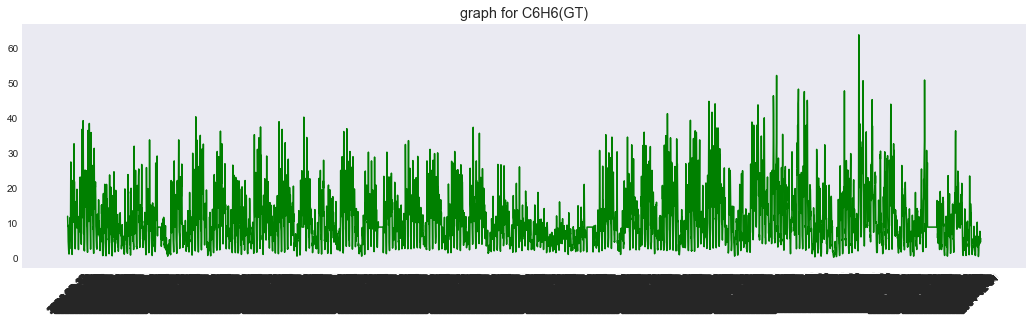

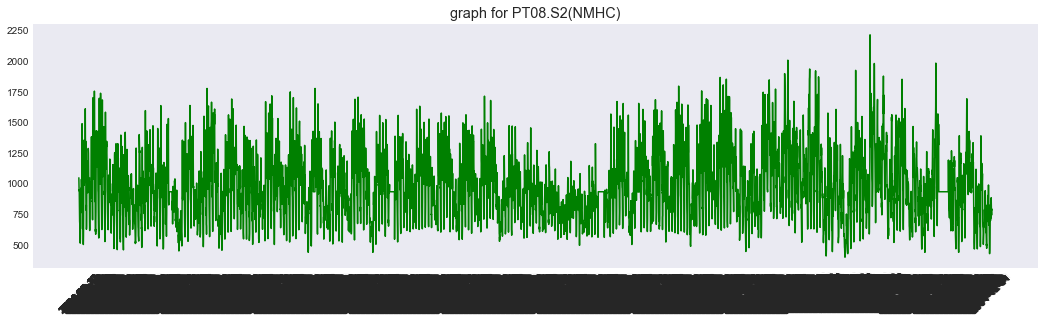

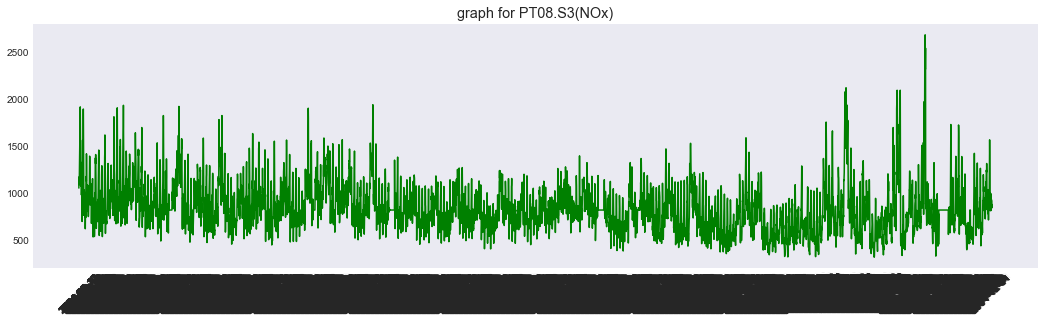

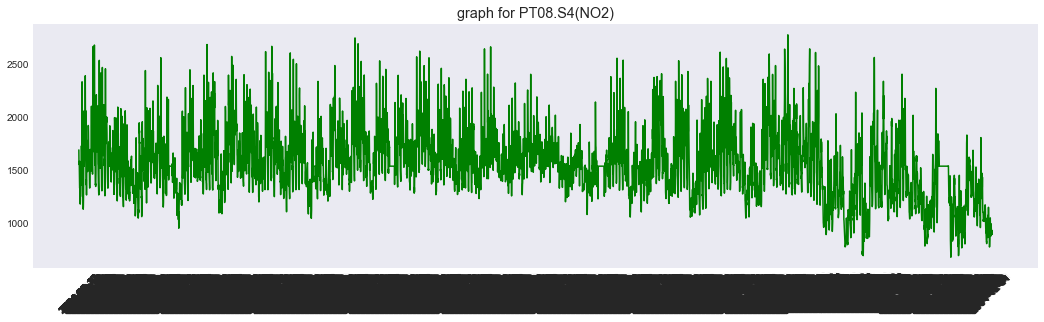

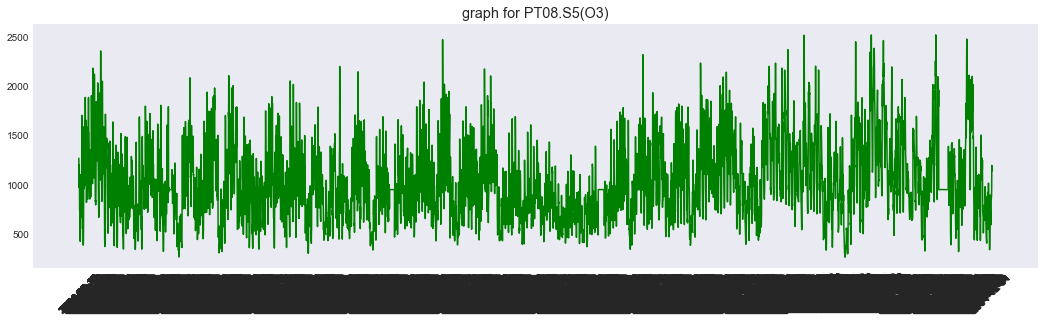

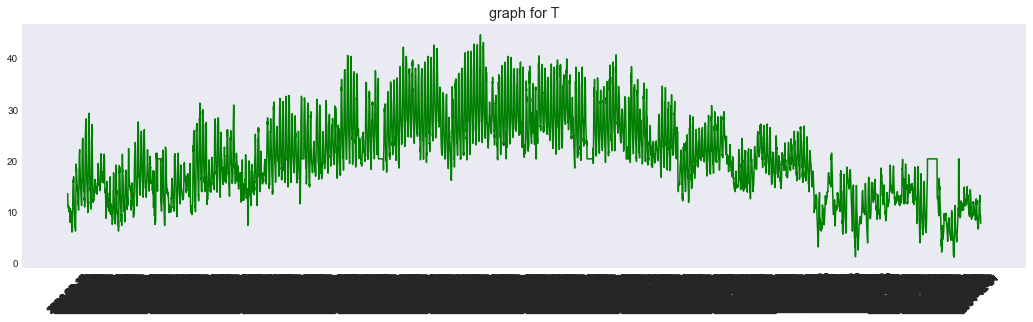

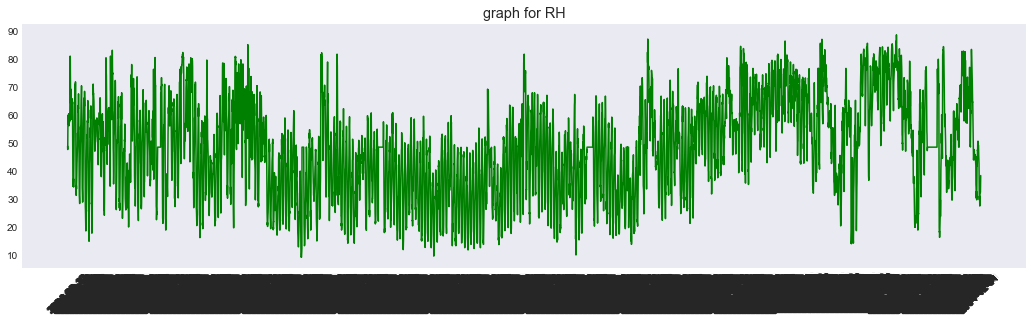

In [38]:
for col in aq_2004_df.columns[2:-5]:
    line_plot('seaborn-dark',aq_2004_df['DateTime'],aq_2004_df[col],18,4.5,'green')

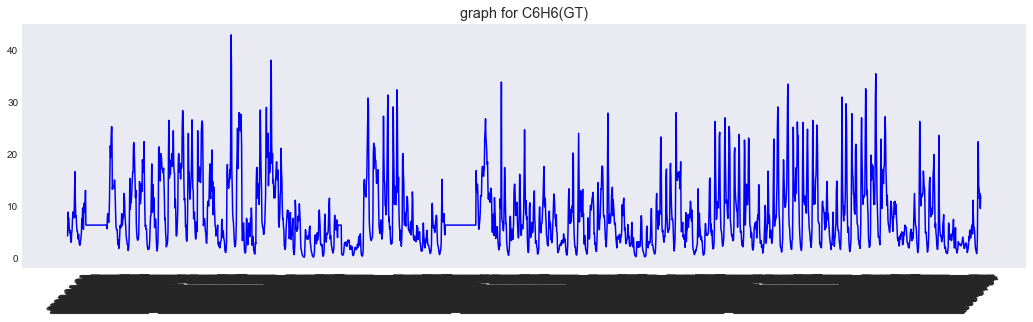

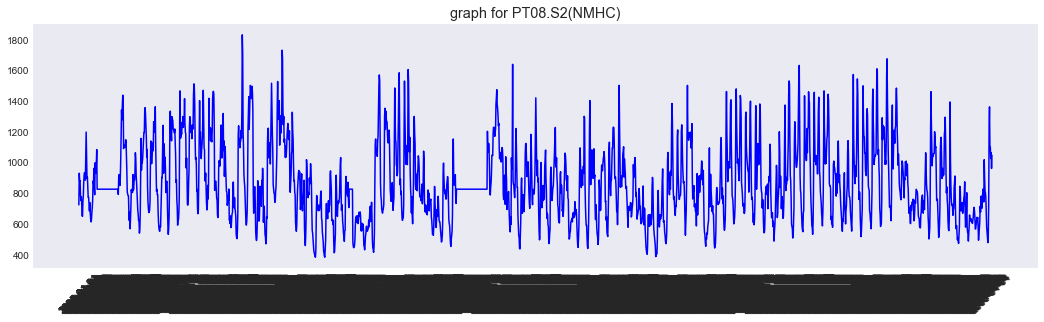

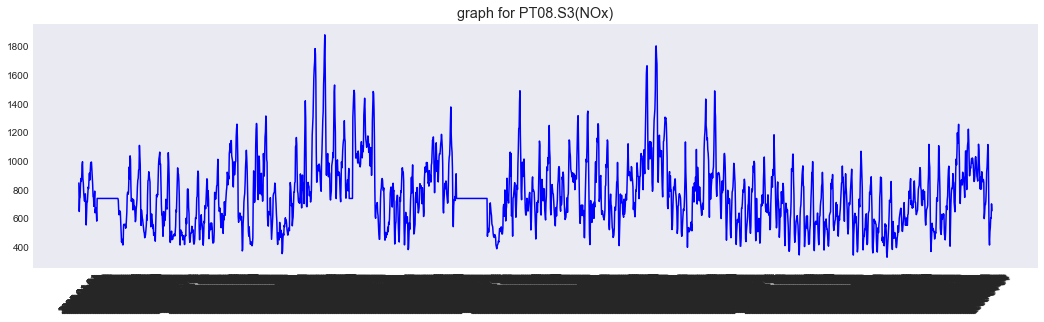

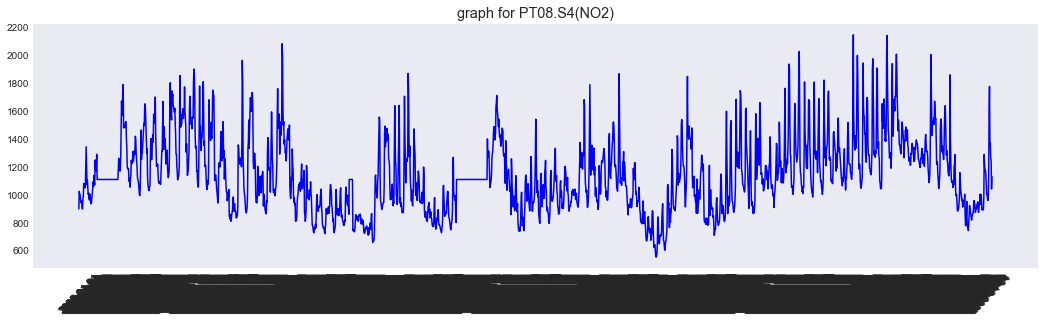

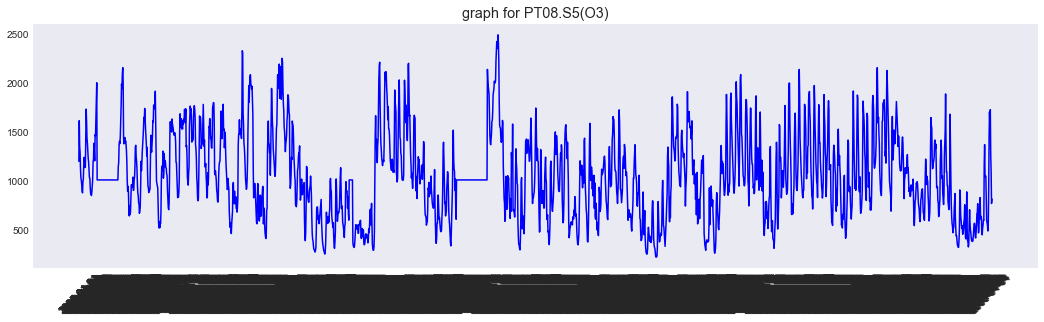

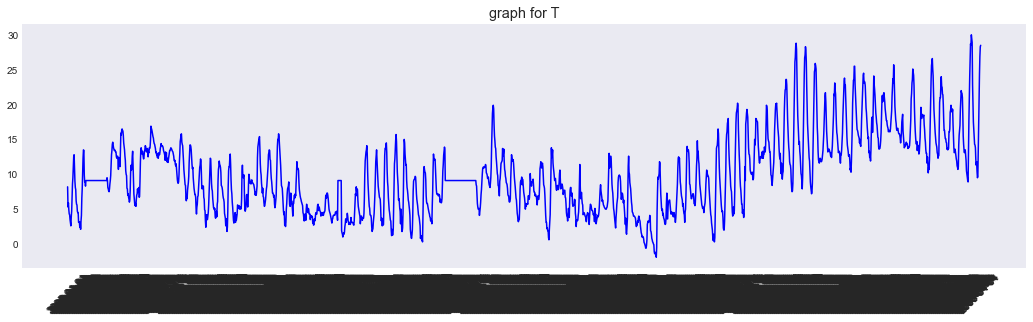

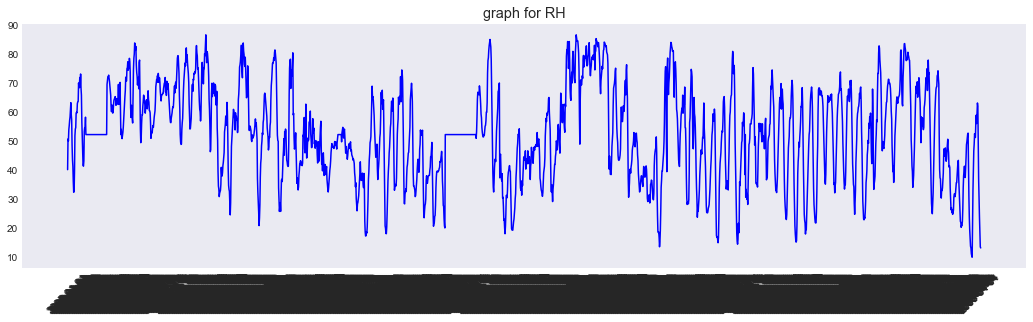

In [39]:
for col in aq_2005_df.columns[2:-5]:
    line_plot('seaborn-dark',aq_2005_df['DateTime'],aq_2005_df[col],18,4.5,'blue')

In [18]:
df=pd.concat([aq_2004_df,aq_2005_df])
df 

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,2005,4,4,Monday
9353,2005-04-04 11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,2005,4,4,Monday
9354,2005-04-04 12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,2005,4,4,Monday
9355,2005-04-04 13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,2005,4,4,Monday


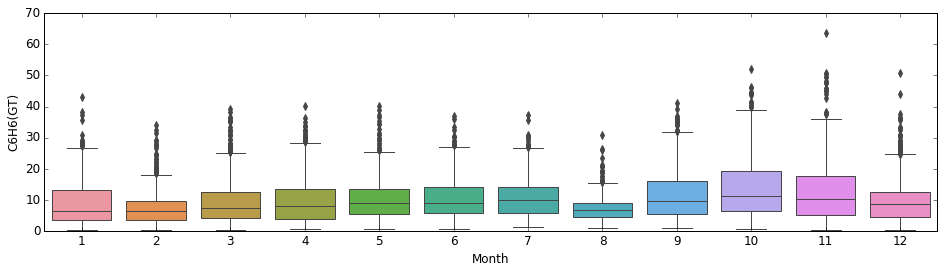

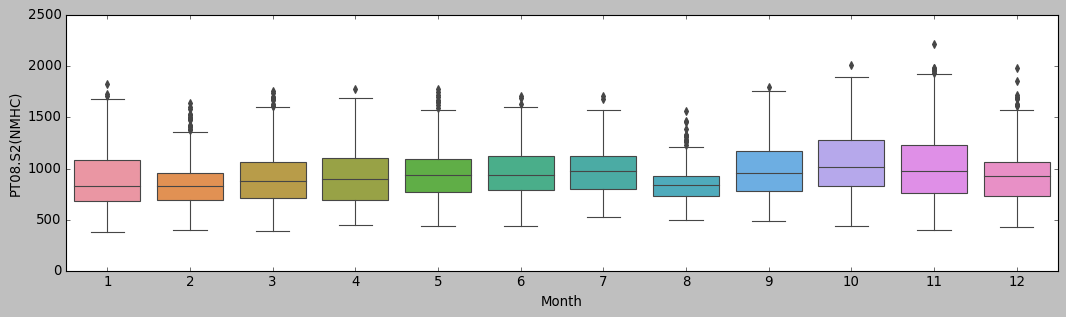

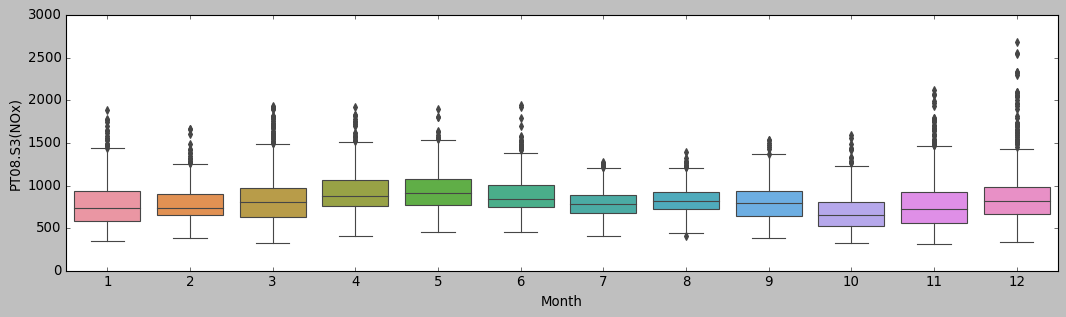

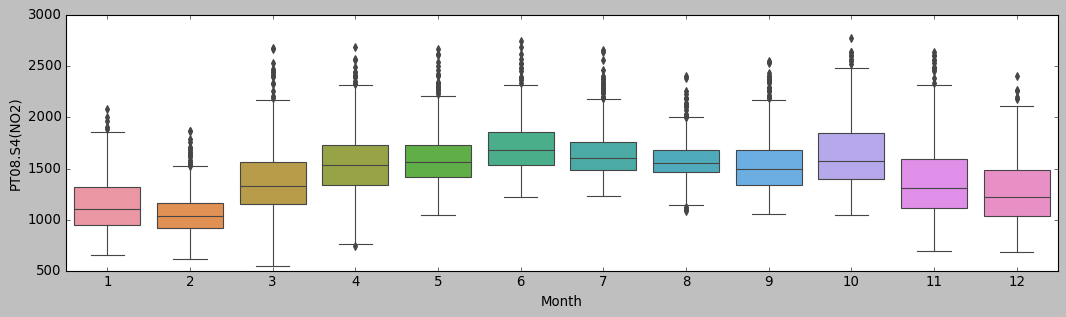

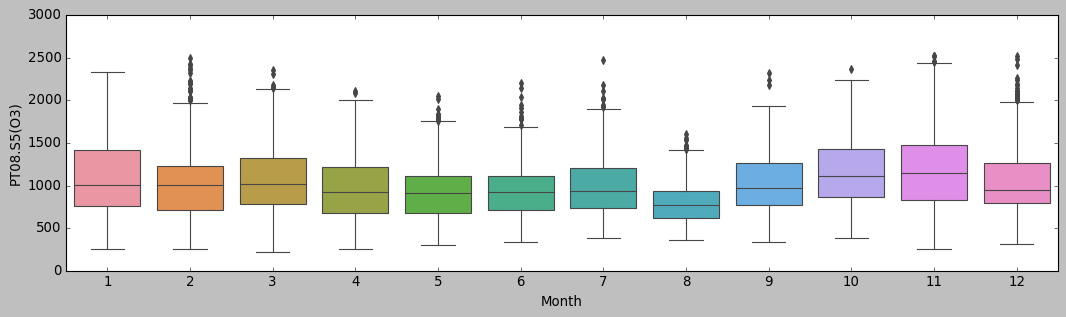

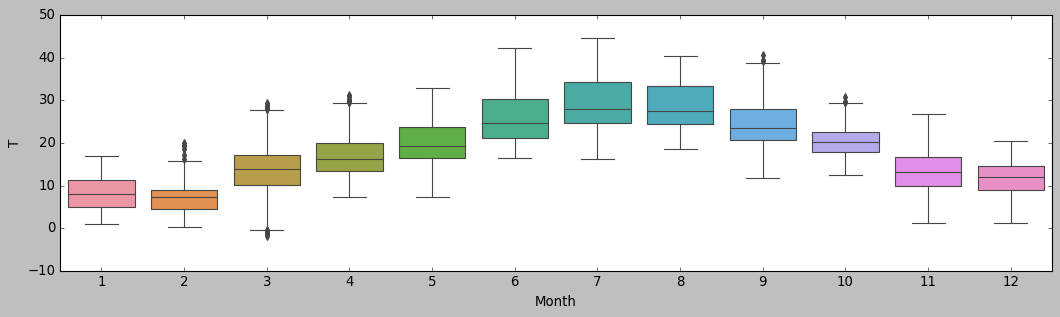

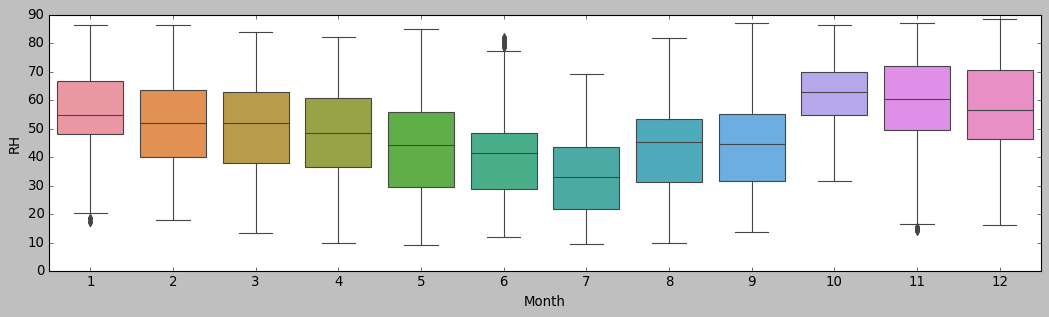

In [19]:
for col in df.columns[2:-5]:
    plt.figure(figsize=(16,4))
    plt.style.use('classic')
    sns.boxplot(x='Month',y=col,data=df)
    plt.show()

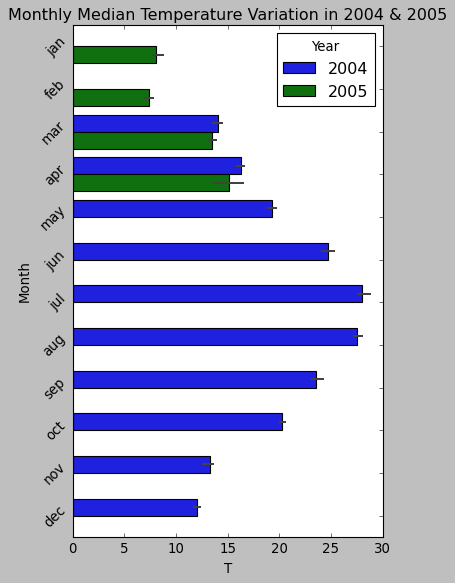

In [20]:
from numpy import median

df['Month'] = df['Month'].astype('category')

plt.figure(figsize=(5, 8))
plt.title('Monthly Median Temperature Variation in 2004 & 2005')
sns.barplot(x='T', y='Month', hue='Year', data=df, estimator=median)
plt.yticks(ticks=np.arange(12), labels=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], rotation=45)
plt.show()

C:\Users\maroj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


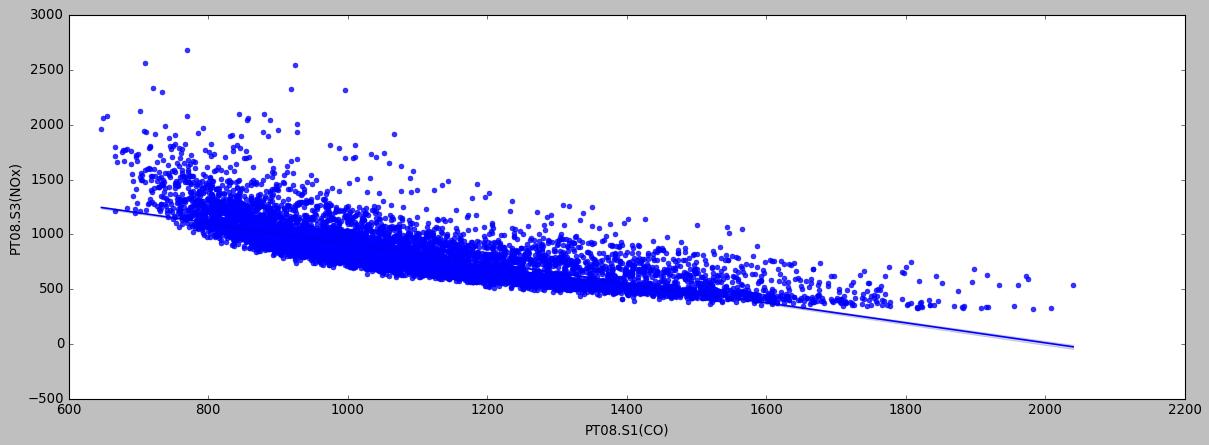

In [21]:
plt.figure(figsize=(18,6))
sns.regplot(df['PT08.S1(CO)'],df['PT08.S3(NOx)'])
plt.show()

In [22]:
corr_df = df.iloc[:,1:-4].corr()
corr_df

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.000000,0.882921,0.892097,-0.769920,0.677392,0.899369,0.048765,0.114426,0.134961
C6H6(GT),0.882921,1.000000,0.981707,-0.730267,0.764243,0.864326,0.203647,-0.062666,0.172959
PT08.S2(NMHC),0.892097,0.981707,1.000000,-0.792370,0.775995,0.879285,0.245397,-0.091310,0.191374
PT08.S3(NOx),-0.769920,-0.730267,-0.792370,1.000000,-0.528111,-0.795013,-0.138125,-0.057582,-0.224756
PT08.S4(NO2),0.677392,0.764243,0.775995,-0.528111,1.000000,0.585281,0.568770,-0.034751,0.635471
PT08.S5(O3),0.899369,0.864326,0.879285,-0.795013,0.585281,1.000000,-0.027593,0.124988,0.069730
T,0.048765,0.203647,0.245397,-0.138125,0.568770,-0.027593,1.000000,-0.576271,0.661982
RH,0.114426,-0.062666,-0.091310,-0.057582,-0.034751,0.124988,-0.576271,1.000000,0.163933
AH,0.134961,0.172959,0.191374,-0.224756,0.635471,0.069730,0.661982,0.163933,1.000000


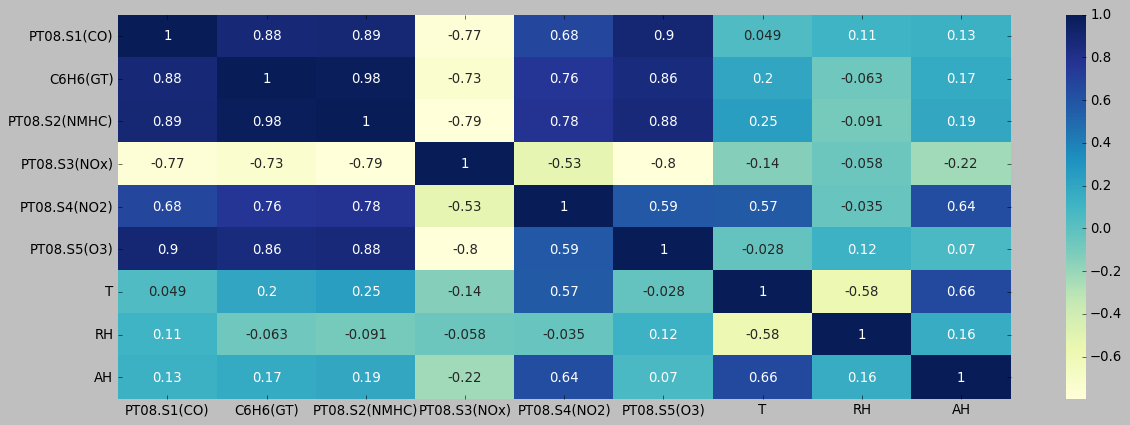

In [24]:
plt.figure(figsize=(18,6))
sns.heatmap(corr_df,annot=True,cmap='YlGnBu')
plt.show()

<Figure size 1440x480 with 0 Axes>

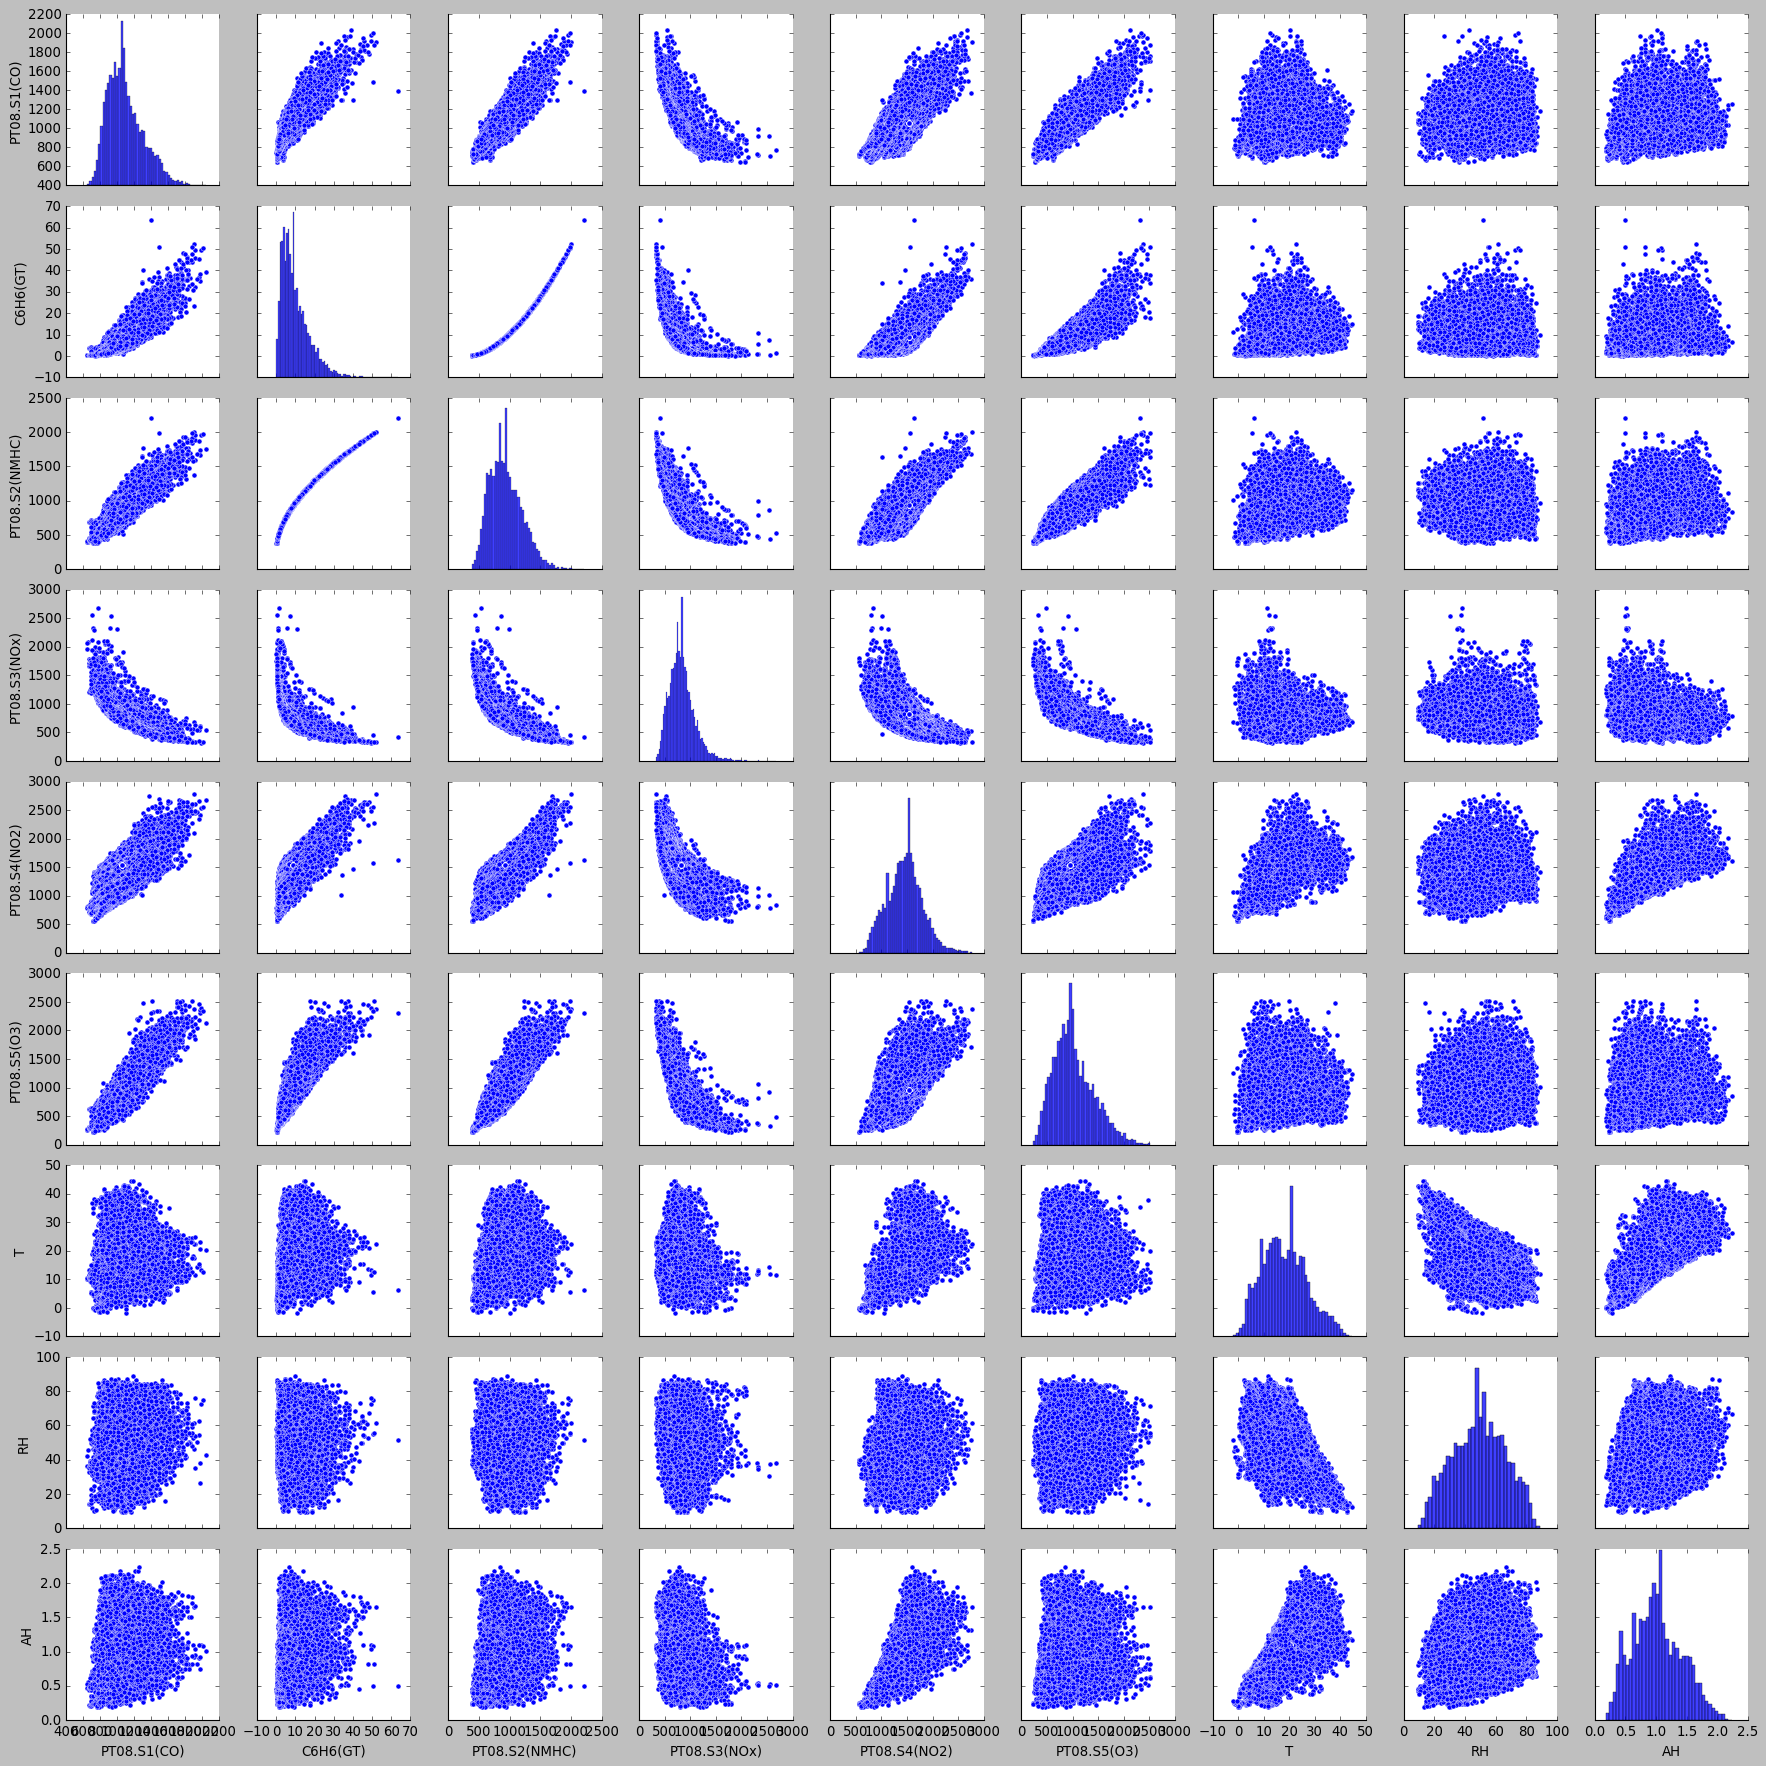

In [25]:
plt.figure(figsize=(18,6))
sns.pairplot(df.iloc[:,1:-4])
plt.show()

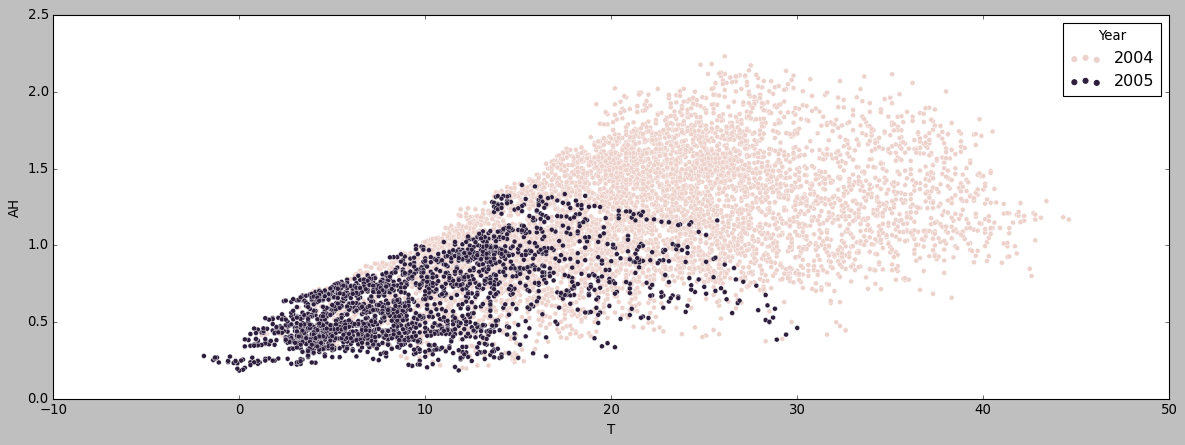

In [26]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='T',y="AH",data=df,hue='Year')
plt.show()

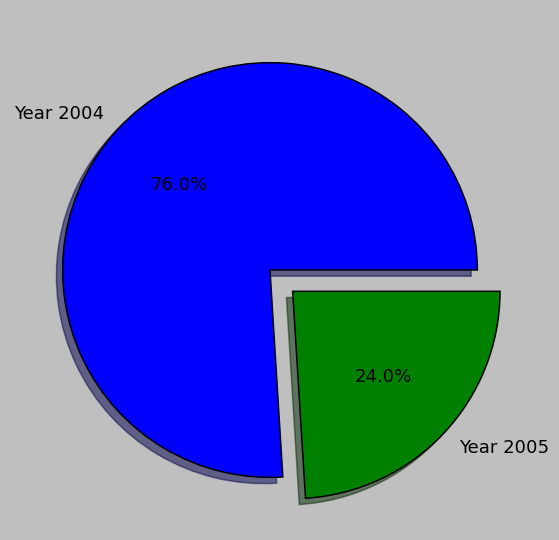

In [28]:
year_arr = df['Year'].value_counts().values*100/df.shape[0]

plt.figure(dpi=108)
plt.pie(year_arr,labels=['Year 2004', 'Year 2005'],autopct='%1.1f%%',explode=[0,0.15],shadow=True)
plt.show()

In [30]:
month_names = df['DateTime'].dt.month_name()
df['Month Name'] = month_names

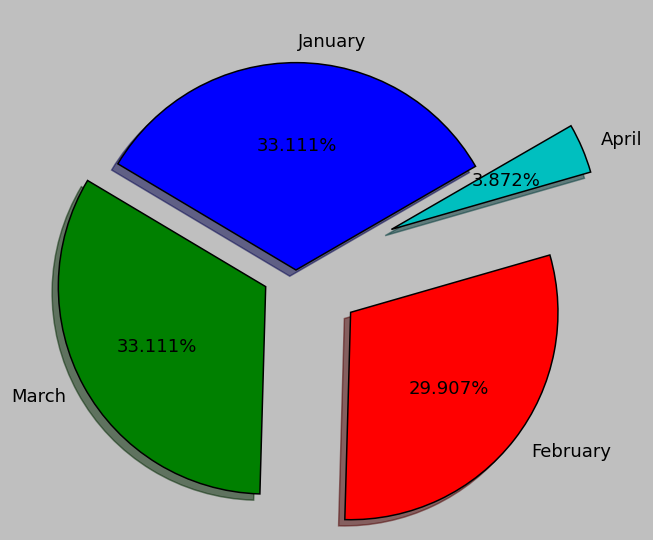

In [31]:
month_2005 = df.loc[df['Year']==2005,'Month Name'].value_counts()
month_2005
plt.figure(dpi=108)
plt.pie(month_2005,labels=month_2005.index,shadow=True,autopct="%1.3f%%",explode=np.linspace(0,0.5,4),startangle=30)
plt.show()


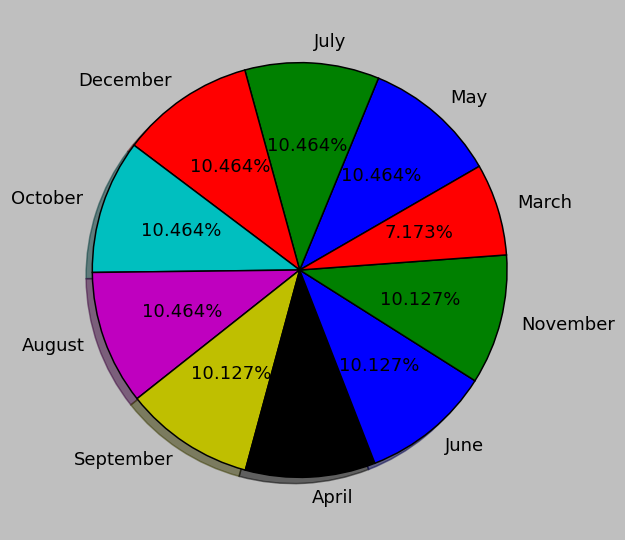

In [32]:
month_2004 = df.loc[df['Year']==2004,'Month Name'].value_counts()
plt.figure(dpi=108)
plt.pie(month_2004,labels=month_2004.index,shadow=True,autopct="%1.3f%%",startangle=30)
plt.show()

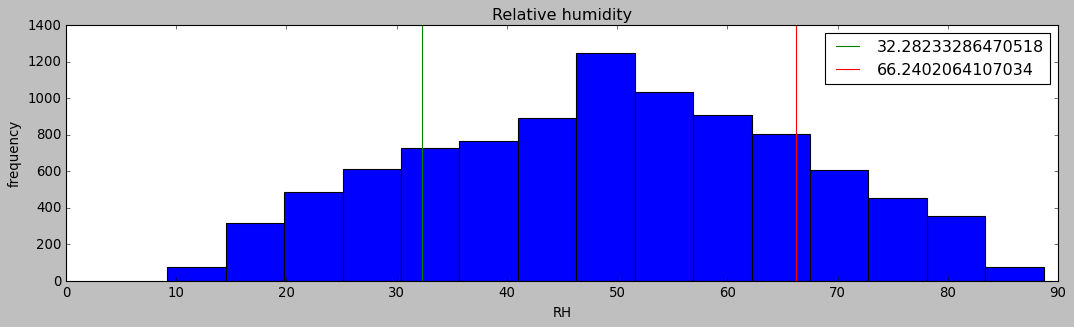

In [33]:
plt.figure(figsize=(16,4))
plt.title("Relative humidity")
plt.hist(df['RH'],bins='sturges')
plt.axvline(x=df['RH'].mean()-df['RH'].std(),color='green',label=f"{ df['RH'].mean() -df['RH'].std()}")
plt.axvline(x=df['RH'].mean()+df['RH'].std(),color='red',label=f"{df['RH'].mean()+df['RH'].std()}")
plt.legend()
plt.xlabel("RH")
plt.ylabel("frequency")
plt.show()